In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
grography = pd.get_dummies(X['Geography'], dtype=int, drop_first = True)
gender = pd.get_dummies(X['Gender'], dtype=int, drop_first = True)

In [ ]:
#concatinate
X = X.drop(['Geography','Gender'], axis=1)

In [ ]:
X = pd.concat([X,grography,gender], axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
#creating the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU

In [ ]:
#initialize the ANN
classifier = Sequential()

In [ ]:
#input layer
classifier.add(Dense(units=11, activation='relu'))

In [ ]:
#adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
#adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [ ]:
#output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#learning rate
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7978 - loss: 0.4687 - val_accuracy: 0.8432 - val_loss: 0.3729
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8392 - loss: 0.3811 - val_accuracy: 0.8448 - val_loss: 0.3727
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8598 - loss: 0.3513 - val_accuracy: 0.8478 - val_loss: 0.3678
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8563 - loss: 0.3518 - val_accuracy: 0.8497 - val_loss: 0.3656
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8558 - loss: 0.3536 - val_accuracy: 0.8516 - val_loss: 0.3672
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8527 - loss: 0.3507 - val_accuracy: 0.8569 - val_loss: 0.3593
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8643 - loss: 0.3357 - val_accuracy: 0.8444 - val_loss: 0.3732
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8665 - loss: 0.3358 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

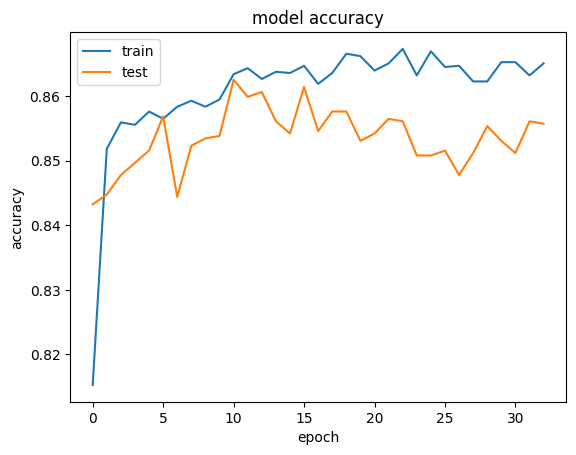

In [ ]:
#summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

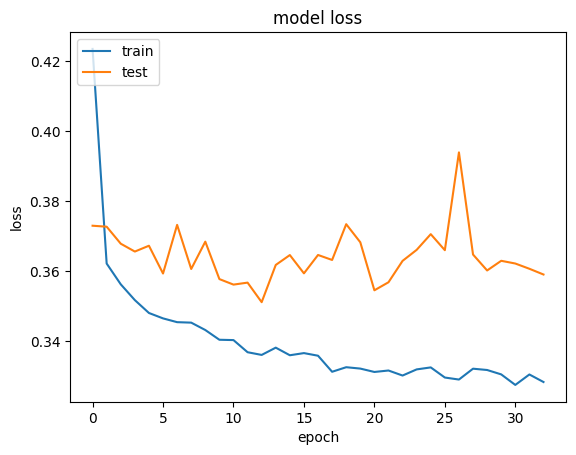

In [ ]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#making the prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
#confusion matriix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1546,   49],
       [ 230,  175]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [ ]:
score

0.8605

In [ ]:
#get the weights
classifier.get_weights()

[array([[ 1.87274620e-01, -2.60571331e-01,  4.92588013e-01,
          1.33225095e+00,  1.35346621e-01,  4.46426064e-01,
         -2.66756564e-01, -1.15794063e-01,  1.64523572e-01,
         -4.72829938e-02,  3.32321346e-01],
        [ 3.39247704e-01, -2.44665861e+00,  1.21497035e+00,
          6.47473454e-01,  8.68494868e-01, -1.89855731e+00,
         -1.54896700e+00,  2.64123917e+00, -3.20135331e+00,
          2.33303452e+00,  9.30408537e-02],
        [ 3.05661142e-01,  1.27299353e-01,  4.86814797e-01,
          6.67679012e-01, -6.58004284e-01, -9.58445519e-02,
          3.91832858e-01,  5.55645376e-02,  2.66360445e-03,
          2.65910655e-01,  2.28746664e-02],
        [ 3.19261730e-01,  6.66076601e-01, -2.35925213e-01,
         -2.13358092e+00,  2.38119292e+00,  5.99634707e-01,
          8.72275710e-01, -8.81511211e-01, -1.95706451e+00,
          5.52003562e-01, -2.61120701e+00],
        [ 3.01936531e+00, -7.58406043e-01,  3.09816211e-01,
          2.23912820e-01,  1.33419871e+00,  